In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import imutils
import cv2


#import torch
#import torchvision
#import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image, ImageDraw
import xml.etree.ElementTree as ET

In [2]:
with open('/home/pedrodsk/datasets/dataset2/PKLot/UFPR04/Sunny/2012-12-07/2012-12-07_19_02_27.xml') as annot_file:
    print(''.join(annot_file.readlines()))

<?xml version="1.0"?>
<parking id="ufpr04">
  <space id="1" occupied="0">
    <rotatedRect>
      <center x="724" y="623" />
      <size w="93" h="154" />
      <angle d="-31" />
    </rotatedRect>
    <contour>
      <point x="720" y="549" />
      <point x="805" y="665" />
      <point x="715" y="698" />
      <point x="644" y="582" />
    </contour>
  </space>
  <space id="2" occupied="1">
    <rotatedRect>
      <center x="774" y="511" />
      <size w="79" h="132" />
      <angle d="-42" />
    </rotatedRect>
    <contour>
      <point x="769" y="451" />
      <point x="849" y="534" />
      <point x="789" y="586" />
      <point x="701" y="489" />
    </contour>
  </space>
  <space id="3" occupied="0">
    <rotatedRect>
      <center x="812" y="445" />
      <size w="62" h="123" />
      <angle d="-45" />
    </rotatedRect>
    <contour>
      <point x="806" y="399" />
      <point x="879" y="466" />
      <point x="823" y="499" />
      <point x="747" y="425" />
    </contour>
 

In [3]:
tree = ET.parse('/home/pedrodsk/datasets/dataset2/PKLot/UFPR04/Sunny/2012-12-07/2012-12-07_19_02_27.xml')
root = tree.getroot()

pts = np.empty(0,np.int32)

for neighbor in root.iter('point'):
    #print(neighbor.attrib)
    x,y = neighbor.attrib.values()
    x = int(x)
    y = int(y)
    a = [x,y]
    pts = np.append(pts,[x,y])

    #ymin = int(neighbor.find('ymin').text)
    #xmax = int(neighbor.find('xmax').text)
    #ymax = int(neighbor.find('ymax').text)
    #print('teste')
    
#     print(xmin, ymin, xmax, ymax)
#    sample_annotations.append([xmin, ymin, xmax, ymax])
    
#print(sample_annotations)

In [4]:
pts[0:4]

array([720, 549, 805, 665])

In [5]:
pts = np.append(pts,[x,y])
pts = np.concatenate((pts, pts))
pts

array([720, 549, 805, 665, 715, 698, 644, 582, 769, 451, 849, 534, 789,
       586, 701, 489, 806, 399, 879, 466, 823, 499, 747, 425, 829, 323,
       900, 383, 862, 430, 771, 356, 850, 282, 918, 322, 891, 368, 810,
       311, 863, 231, 938, 271, 909, 309, 832, 262, 884, 194, 956, 231,
       928, 265, 851, 221, 904, 166, 978, 200, 951, 226, 874, 189, 920,
       137, 982, 162, 970, 189, 897, 159, 618, 563, 648, 630, 485, 685,
       470, 603, 776, 281, 797, 317, 698, 348, 678, 310, 808, 242, 827,
       273, 725, 299, 711, 262, 834, 198, 853, 233, 751, 254, 736, 214,
       848, 168, 868, 201, 771, 213, 760, 186, 876, 142, 885, 174, 806,
       179, 798, 150, 403, 250, 438, 300, 386, 327, 361, 267, 456, 213,
       486, 262, 438, 280, 408, 231, 501, 179, 534, 221, 492, 246, 458,
       201, 536, 150, 569, 186, 529, 204, 495, 171, 570, 120, 606, 153,
       566, 176, 530, 145, 600,  99, 635, 131, 601, 150, 563, 120, 242,
       275, 272, 349, 204, 364, 189, 297, 306, 241, 334, 297, 27

In [6]:
pts

array([720, 549, 805, 665, 715, 698, 644, 582, 769, 451, 849, 534, 789,
       586, 701, 489, 806, 399, 879, 466, 823, 499, 747, 425, 829, 323,
       900, 383, 862, 430, 771, 356, 850, 282, 918, 322, 891, 368, 810,
       311, 863, 231, 938, 271, 909, 309, 832, 262, 884, 194, 956, 231,
       928, 265, 851, 221, 904, 166, 978, 200, 951, 226, 874, 189, 920,
       137, 982, 162, 970, 189, 897, 159, 618, 563, 648, 630, 485, 685,
       470, 603, 776, 281, 797, 317, 698, 348, 678, 310, 808, 242, 827,
       273, 725, 299, 711, 262, 834, 198, 853, 233, 751, 254, 736, 214,
       848, 168, 868, 201, 771, 213, 760, 186, 876, 142, 885, 174, 806,
       179, 798, 150, 403, 250, 438, 300, 386, 327, 361, 267, 456, 213,
       486, 262, 438, 280, 408, 231, 501, 179, 534, 221, 492, 246, 458,
       201, 536, 150, 569, 186, 529, 204, 495, 171, 570, 120, 606, 153,
       566, 176, 530, 145, 600,  99, 635, 131, 601, 150, 563, 120, 242,
       275, 272, 349, 204, 364, 189, 297, 306, 241, 334, 297, 27

In [7]:
pts = np.empty(0,np.int32)

In [8]:
a = np.empty(0,np.int32)

In [9]:
a = np.append(a,[x,y],np.in)


SyntaxError: invalid syntax (842218790.py, line 1)

In [ ]:
a

In [ ]:
type(a)

In [ ]:

img = cv2.imread("exemplo.png")
pts = np.array([[10,150],[150,100],[300,150],[350,100],[310,20],[35,10]])

## (1) Crop the bounding rect
rect = cv2.boundingRect(pts)
x,y,w,h = rect
croped = img[y:y+h, x:x+w].copy()

## (2) make mask
pts = pts - pts.min(axis=0)

mask = np.zeros(croped.shape[:2], np.uint8)
cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)

## (3) do bit-op
dst = cv2.bitwise_and(croped, croped, mask=mask)

## (4) add the white background
bg = np.ones_like(croped, np.uint8)*255
cv2.bitwise_not(bg,bg, mask=mask)
dst2 = bg+ dst


cv2.imwrite("croped.png", croped)
cv2.imwrite("mask.png", mask)
cv2.imwrite("dst.png", dst)
cv2.imwrite("dst2.png", dst2)

In [ ]:
pts.min(axis=0)

In [ ]:
cv2.imshow("crop", dst)
k = cv2.waitKey(0)

if k == ord('q'):
    cv2.destroyAllWindows()

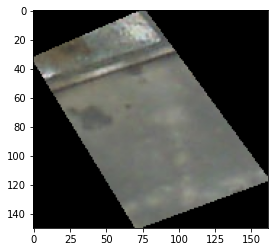

In [10]:
BASE_PATH = ['../..','datasets']
path2 = '/dataset2/PKLot/UFPR04/Sunny/2012-12-07'
path2 = os.path.normpath(path2)
path2 = path2.split(os.sep)

IMAGE_DIR = os.path.join(BASE_PATH[0],BASE_PATH[1],path2[1],path2[2],path2[3],path2[4],path2[5])

ImagemCompleta = os.path.join(IMAGE_DIR,'2012-12-07_19_02_27.jpg')

#im = cv2.imread("exemplo.png")
im = cv2.imread(ImagemCompleta)

if im is None:
    sys.exit("A imagem não foi carregada.")

#pts = np.array([[10,150],[150,100],[300,150],[350,100],[310,20],[35,10]])
pts = np.array([[720,549],[805,665],[715,698],[644,582]])

rect = cv2.boundingRect(pts)
x,y,w,h = rect
croped = im[y:y+h, x:x+w].copy()

pts = pts - pts.min(axis=0)
mask = np.zeros(croped.shape[:2], croped.dtype)
cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)

## (3) do bit-op
dst = cv2.bitwise_and(croped, croped, mask=mask)

bg = np.ones_like(croped, np.uint8)*255
cv2.bitwise_not(bg,bg, mask=mask)
dst2 = bg+ dst

image = cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)
plt.imshow(image)
#cv2.resize(dst2, (70,50), interpolation = cv2.INTER_AREA)

#cv2.imshow("crop", dst)
#k = cv2.waitKey(0)

#if k == ord('q'):
#    cv2.destroyAllWindows()

#image = imutils.rotate(image, angle=-31)
#image = image[0:128, 0:128]
#image = cv2.resize(image, (128,128), interpolation = cv2.INTER_CUBIC)

#!ls $IMAGE_DIR

In [ ]:
cv2.imshow("crop", croped)
k = cv2.waitKey(0)

if k == ord('q'):
    cv2.destroyAllWindows()

In [ ]:
tmp = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
_,alpha = cv2.threshold(tmp,0,255,cv2.THRESH_BINARY)
b, g, r = cv2.split(dst)
rgba = [b,g,r, alpha]
masked_tr = cv2.merge(rgba,4)

#masked_tr = cv2.cvtColor(masked_tr, cv2.COLOR_BGRA2BGR)
image = cv2.resize(masked_tr, (128,128), interpolation = cv2.INTER_CUBIC)

#image_without_alpha = image[:,:,:1]
cv2.imwrite('vaga1.png', image)
plt.axis('off')
plt.imshow(image)

In [ ]:
image.shape

In [ ]:
plt.imshow(image_without_alpha)